In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt

In [11]:
train_path = './train'
valid_path = './valid'
test_path = './test'

Batchsize = 10
Img_height = 200
Img_width = 200


In [3]:

# os.chdir('./Eyes-M-F/female-male')
# if os.path.isdir('train/male') is False:
#     os.chdir('./')
#     os.makedirs('train/male')
#     os.makedirs('train/female')
#     os.makedirs('valid/male')
#     os.makedirs('valid/female')
#     os.makedirs('test/male')
#     os.makedirs('test/female')

#     for i in random.sample(glob.glob('male*'), 500):
#         shutil.move(i, 'train/male')      
#     for i in random.sample(glob.glob('female*'), 500):
#         shutil.move(i, 'train/female')
#     for i in random.sample(glob.glob('male*'), 100):
#         shutil.move(i, 'valid/male')        
#     for i in random.sample(glob.glob('female*'), 100):
#         shutil.move(i, 'valid/female')
#     for i in random.sample(glob.glob('male*'), 50):
#         shutil.move(i, 'test/male')      
#     for i in random.sample(glob.glob('female*'), 50):
#         shutil.move(i, 'test/female')

# os.chdir('../../')


In [99]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [16]:

train_ds = tf.keras.utils.image_dataset_from_directory(
train_path,
    
    image_size=(Img_height, Img_width),
    batch_size=Batchsize,
)


val_ds = tf.keras.utils.image_dataset_from_directory(
valid_path,
    image_size=(Img_height, Img_width),
    batch_size=Batchsize,
)
test_ds = tf.keras.utils.image_dataset_from_directory(
test_path,
    image_size=(Img_height, Img_width),
    batch_size=Batchsize,
)

Found 1000 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [102]:
class_names =train_ds.class_names
class_names

['female', 'male']

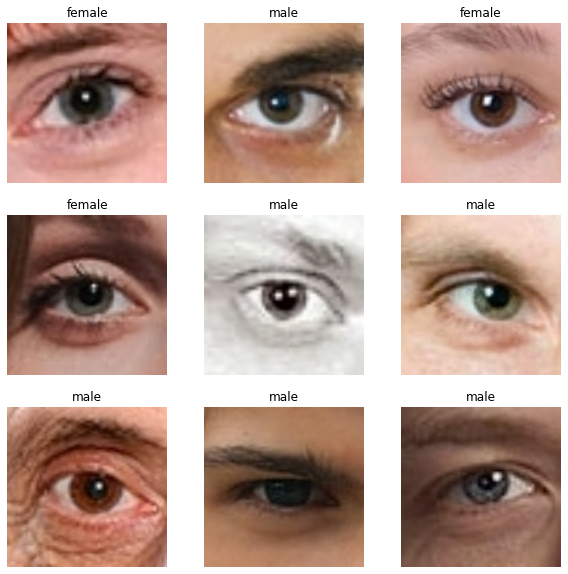

In [103]:

plt.figure(figsize=((10,10)))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax= plt.subplot(3,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')


In [13]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(Img_height,Img_width, 3)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),

Flatten(),
Dense(63, activation='relu'),
    Dense(2)
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)       

In [16]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [17]:
model.fit(train_ds, validation_data=val_ds, epochs=30, verbose=True)

Epoch 1/30
100/100 [==============================] - 49s 487ms/step - loss: 1.2926 - accuracy: 0.5610 - val_loss: 0.9551 - val_accuracy: 0.5300
Epoch 2/30
100/100 [==============================] - 51s 512ms/step - loss: 0.6982 - accuracy: 0.5770 - val_loss: 0.6661 - val_accuracy: 0.5750
Epoch 3/30
100/100 [==============================] - 50s 501ms/step - loss: 0.6489 - accuracy: 0.6660 - val_loss: 0.5327 - val_accuracy: 0.7650
Epoch 4/30
100/100 [==============================] - 50s 499ms/step - loss: 0.5631 - accuracy: 0.7270 - val_loss: 0.5235 - val_accuracy: 0.7150
Epoch 5/30
100/100 [==============================] - 49s 486ms/step - loss: 0.5099 - accuracy: 0.7800 - val_loss: 0.4647 - val_accuracy: 0.7900
Epoch 6/30
100/100 [==============================] - 50s 499ms/step - loss: 0.4835 - accuracy: 0.7860 - val_loss: 0.5079 - val_accuracy: 0.7600
Epoch 7/30
100/100 [==============================] - 54s 539ms/step - loss: 0.4947 - accuracy: 0.7930 - val_loss: 0.4044 - val_ac

10/10 - 2s - loss: 0.7341 - accuracy: 0.8200


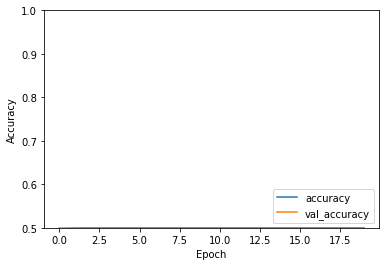

In [115]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds,  verbose=2)

In [ ]:
print(test_acc)

In [106]:
test_ds.take(1)

<TakeDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [129]:
prd =model.predict(test_ds)
prd[0]


array([-12.965705, -33.947475], dtype=float32)

In [130]:
classes = np.argmax(prd, axis=1)
print(classes)

[0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1]


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_images1 = image.load_img('Eyes-M-F/female-male/male100.jpg', target_size = (Img_height, Img_width))
test_images = image.load_img('Eyes-M-F/female-male/female1002.jpg', target_size = (Img_height, Img_width))


In [17]:
val_ds.class_names

['female', 'male']

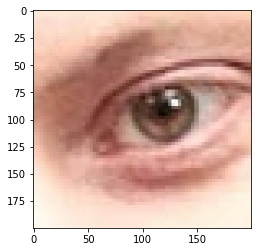

In [14]:
plt.imshow(test_images1)

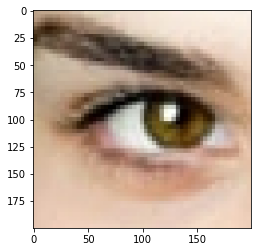

In [15]:
plt.imshow(test_images)

In [ ]:
model.save('Male & Female/M-F.h5')